Базовые методы:

Загрузка библиотек :

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('../data/raw/diabetes_clean.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.133413,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.133413,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.239130,0.133413,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.173913,0.118840,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.304348,0.146484,0.509202,0.479078,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.385870,0.146484,0.300613,0.039710,0.700000,0
764,0.117647,0.503226,0.469388,0.217391,0.133413,0.380368,0.111870,0.100000,0
765,0.294118,0.496774,0.489796,0.173913,0.118840,0.163599,0.071307,0.150000,0
766,0.058824,0.529032,0.367347,0.239130,0.133413,0.243354,0.115713,0.433333,1


Работа с данными

In [27]:
# Разделяем данные на признаки (X) и целевую переменную (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [28]:
# Разделяем на обучающую и тестовую выборки (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
print("Размеры данных:")
print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")
print(f"Распределение классов в y_train: {np.bincount(y_train)}")
print(f"Распределение классов в y_test: {np.bincount(y_test)}")

Размеры данных:
Обучающая выборка: (614, 8)
Тестовая выборка: (154, 8)
Распределение классов в y_train: [400 214]
Распределение классов в y_test: [100  54]


Строим логическую регрессию:

In [30]:
# Создание и обучение модели
model = LogisticRegression(random_state=42, solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [31]:
coeff_df = pd.DataFrame({'Признак': X.columns, 'Коэффициент': model.coef_[0]})
print("\n--- Коэффициенты модели (веса признаков) ---")
print(coeff_df.sort_values(by='Коэффициент', ascending=False))
# по данным ниже можно посмотреть какой признак наиболее влияет на диабет. Чем больше значение, тем больше влияние


--- Коэффициенты модели (веса признаков) ---
                    Признак  Коэффициент
1                   Glucose     4.473492
5                       BMI     2.908170
6  DiabetesPedigreeFunction     1.469380
0               Pregnancies     1.294739
3             SkinThickness     0.842118
7                       Age     0.830763
2             BloodPressure     0.348325
4                   Insulin     0.236820


Оценка модели

In [32]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Вероятность класса 1

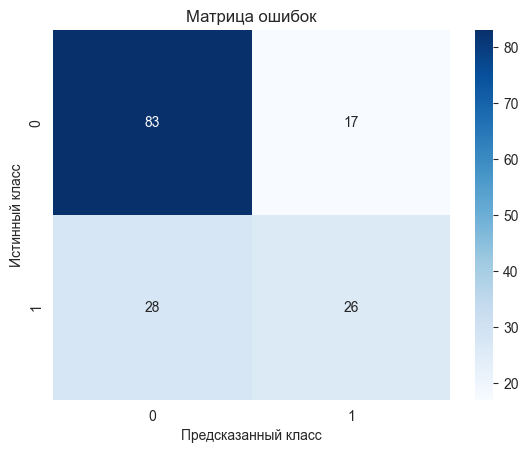

In [33]:
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Вероятность класса 1
# Визуализация матрицы ошибок
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок')
plt.show()

In [34]:
print("\n--- Отчет по классификации ---")
print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']))



--- Отчет по классификации ---
              precision    recall  f1-score   support

 No Diabetes       0.75      0.83      0.79       100
    Diabetes       0.60      0.48      0.54        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.66       154
weighted avg       0.70      0.71      0.70       154



1. Общая точность модели:

Accuracy = 71% - модель правильно классифицирует 71% пациентов

Каждый 5-й пациент получает неверный прогноз (29% ошибок)

2. Анализ по классам:

Для класса "Нет диабета" (0):

Precision = 75% - из всех, кого модель назвала здоровыми, действительно здоровы 75%

Recall = 83% - из всех реально здоровых пациентов модель нашла 83%

F1-мера = 79% - хороший баланс между точностью и полнотой

Для класса "Диабет" (1):

Precision = 60% - из всех, кого модель назвала больными, действительно больны только 60%

Recall = 48% - из всех реально больных пациентов модель нашла менее половины (48%)

F1-мера = 54% - низкий показатель, указывающий на проблемы с классификацией больных

3. Ключевые наблюдения:

Сильный дисбаланс качества: Модель в 1.5 раза лучше определяет здоровых, чем больных

Больше ложных тревог: 40% диагнозов "диабет" - ошибочны (низкий precision)

Опасно низкая полнота: Модель пропускает более половины больных (52% не обнаружены)

4. Проблемные зоны:

Главная проблема: Низкий recall (48%) для диабета - каждый второй больной не получает диагноз

Вторичная проблема: Низкий precision (60%) - много здоровых получают ложный диагноз


ROC-AUC score: 0.809


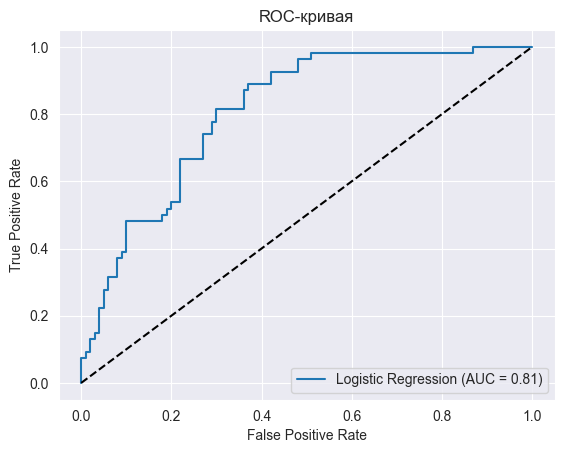

In [35]:
# ROC-AUC метрика (важна для несбалансированных классов)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC-AUC score: {roc_auc:.3f}")

# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend()
plt.show()

Выводы

Общая точность (Accuracy): 71% Модель верно предсказывает диагноз в 7 из 10 случаев. Это базовый, но не самый информативный показатель, особенно для медицинских данных.

По матрице ошибок: Для класса "Нет диабета" (0): Работает хорошо. Из 100 здоровых людей правильно идентифицированы 83 (Recall = 0.83). Ложных тревог (FP) - 17.

Для класса "Диабет" (1): Есть проблема. Из 54 больных диабетом модель нашла только 26 (Recall = 0.48). 28 случаев были пропущены (FN) - это критическая ошибка в медицине.

Класс "Нет диабета": F1 = 0.79 - хороший сбалансированный результат.

Класс "Диабет": F1 = 0.54 - низкий показатель, вызванный плохой полнотой (Recall). Модель часто не замечает больных.

ROC-AUC = 0.8 Это хороший показатель. Модель уверенно разделяет два класса и с точки зрения вероятностных предсказаний работает значительно лучше случайного угадывания

Главный вывод: Модель - хорошая реализована, но требует калибровки порога принятия решения для повышения медицинской безопасности.